In [1]:
from netCDF4 import Dataset                     # For reading data
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt                 # For plotting
import numpy.ma as ma
import xray
# Place figures within document
%pylab inline
pylab.rcParams['figure.figsize'] = (18.0, 10.0) # Large figures

Populating the interactive namespace from numpy and matplotlib


In [19]:
# set the file names
rootPath = '/net/scratch1/lvanroekel/newMesh_w_topo/'
#rootPath = '/net/scratch1/pwolfram/ZISO_10km/'
meshFile = rootPath + 'mesh.nc'
initFile = rootPath + 'init.nc'
forcingFile = rootPath + 'forcing.nc'
outputFile = rootPath + 'output/KPP_test.0005-01-01_00.00.00.nc'

meshData = Dataset(meshFile);
initData = Dataset(initFile);
forcingData = Dataset(forcingFile);
outputData = Dataset(outputFile);

# pick a time level (note, first time record is zero)
iTimeStart = 0
iTimeStop = 1

In [2]:
# xray wrapper for MPAS, assumes year offset of 1700
from mpas_xray import preprocess_mpas, remove_repeated_time_index

# open up series of netcdf files and use the preprocess_mpas to get viable times
ds2 = xray.open_mfdataset('/net/scratch3/lvanroekel/hist.mpas-o.dbg.0003-01-19_00.00.00.nc',\
                          preprocess=preprocess_mpas)
ds = xray.open_mfdataset('/net/scratch1/lvanroekel/newMesh_w_topo/output/KPP_test.0005-12-01_00.00.00.nc',\
                          preprocess=preprocess_mpas)


dsfN = xray.open_mfdataset('/net/scratch1/lvanroekel/newMesh_w_topo/forcing.nc')

dsfO = xray.open_mfdataset('/net/scratch1/pwolfram/ZISO_10km/forcing.nc')

In [56]:
# xray wrapper for MPAS, assumes year offset of 1700
from mpas_xray import preprocess_mpas, remove_repeated_time_index

# open up series of netcdf files and use the preprocess_mpas to get viable times
ds2 = xray.open_mfdataset('/net/scratch1/pwolfram/ZISO_10km/output/output.0015-09-01_00.00.00.nc',\
                          preprocess=preprocess_mpas)

In [4]:
inds = np.where((ds.latCell.values > .174533) & (ds.latCell.values < 0.349) & (ds.lonCell.values > 5.498) & (ds.lonCell.values < 5.672))

In [8]:
from random import randint
randint(0,9)

2

In [30]:
indlist = []
for i in range(14):
    valT = randint(0,len(inds[0])-1)
    if valT not in indlist:
        indlist.append(valT)

In [80]:
2*180/np.pi

114.59155902616465

In [63]:
ds3 = xray.open_mfdataset('/net/scratch3/lvanroekel/out.nc',\
                          preprocess=preprocess_mpas)

(1.3, 2)

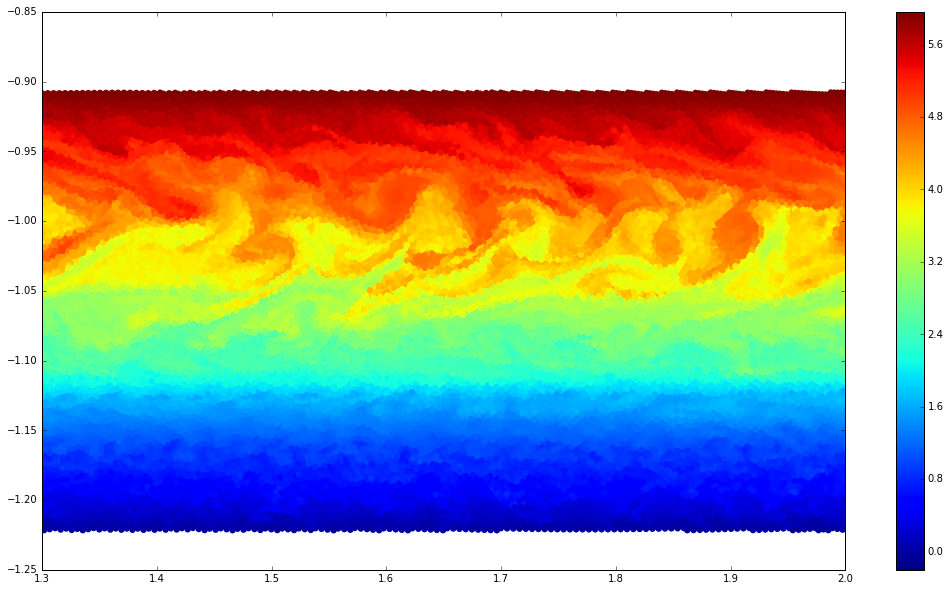

In [78]:
plt.scatter(ds.lonCell[:].values,ds.latCell[:].values,s=40,c=ds.temperature[5,:,0],edgecolor='')
plt.colorbar()
plt.xlim(1.3,2)

(1.3, 2.0)

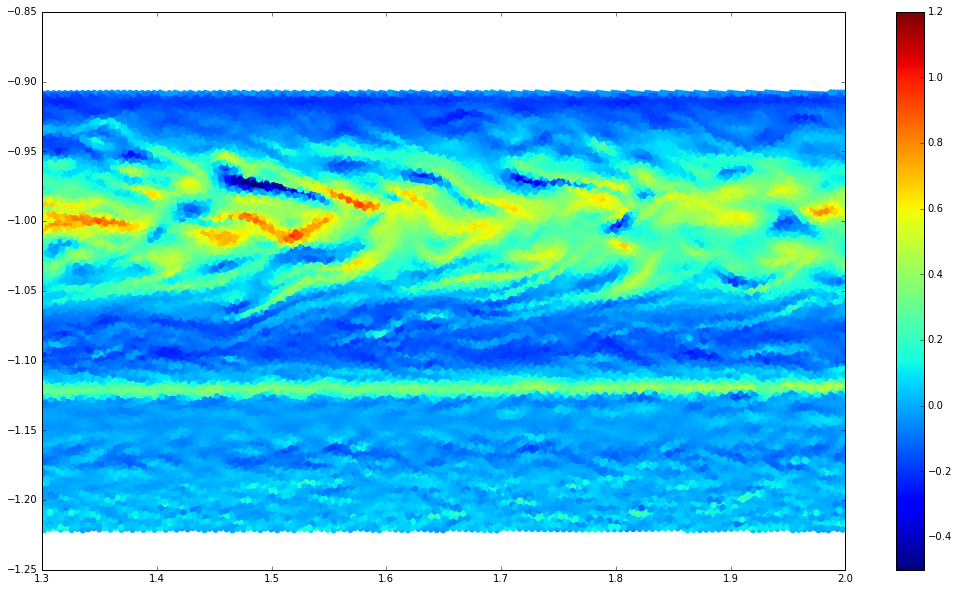

In [81]:
plt.scatter(ds.lonCell[:].values,ds.latCell[:].values,s=40,c=ds.velocityZonal[0,:,0].values,vmin=-0.5,vmax=1.2,edgecolor='')
plt.colorbar()
plt.xlim(1.3,2.0)

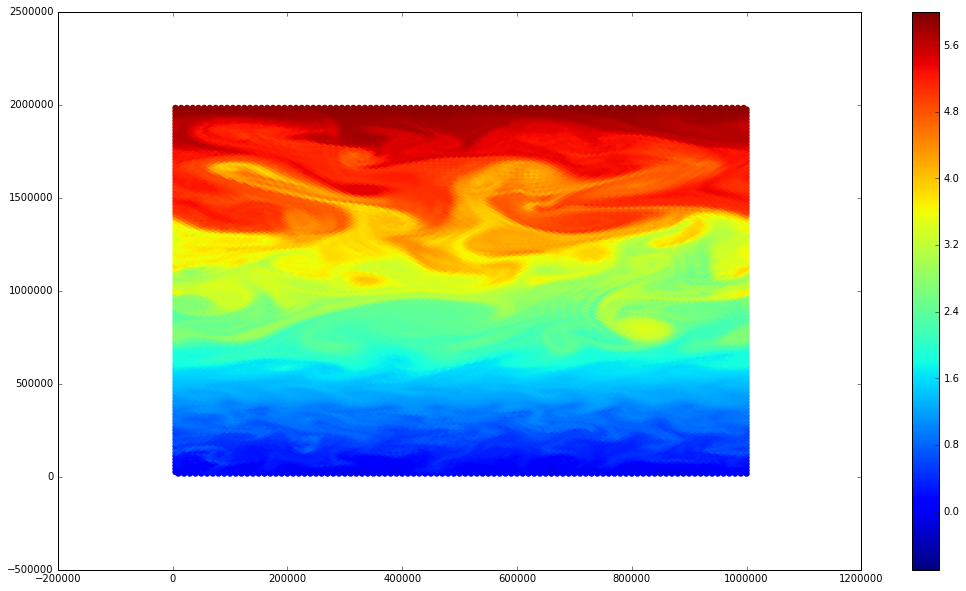

In [71]:
plt.scatter(ds2.xCell.values,ds2.yCell.values,s=40,c=ds2.temperature[0,:,1].values,vmin=-0.7,vmax=6,edgecolor='')
plt.colorbar()

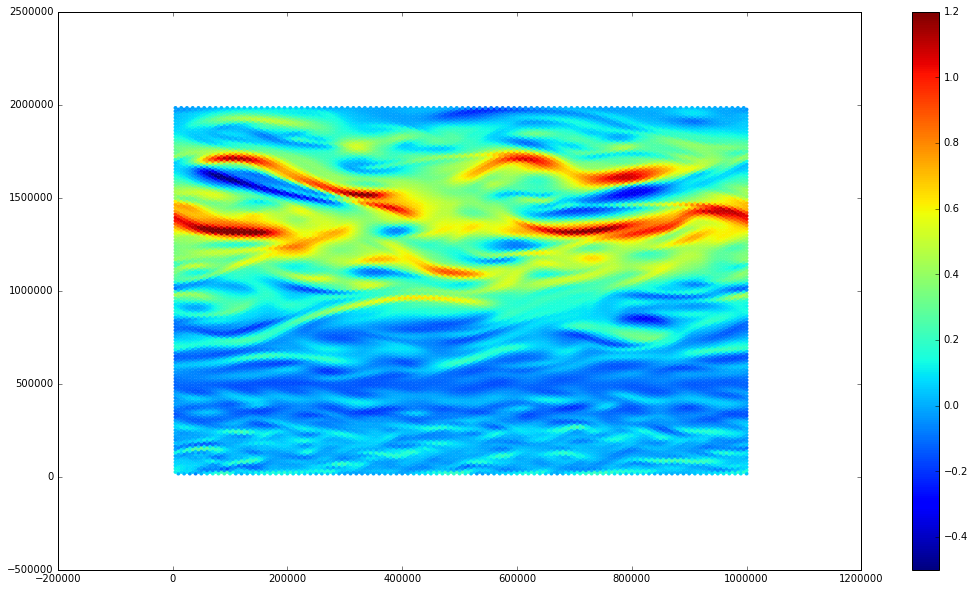

In [109]:
plt.scatter(ds2.xCell[:].values,ds2.yCell[:].values,s=15,c=ds2.velocityZonal[0,:,0].values,vmin=-0.5,vmax=1.2,edgecolor='')
plt.colorbar()

In [82]:
64*np.pi/180.

1.117010721276371

(-100, 0)

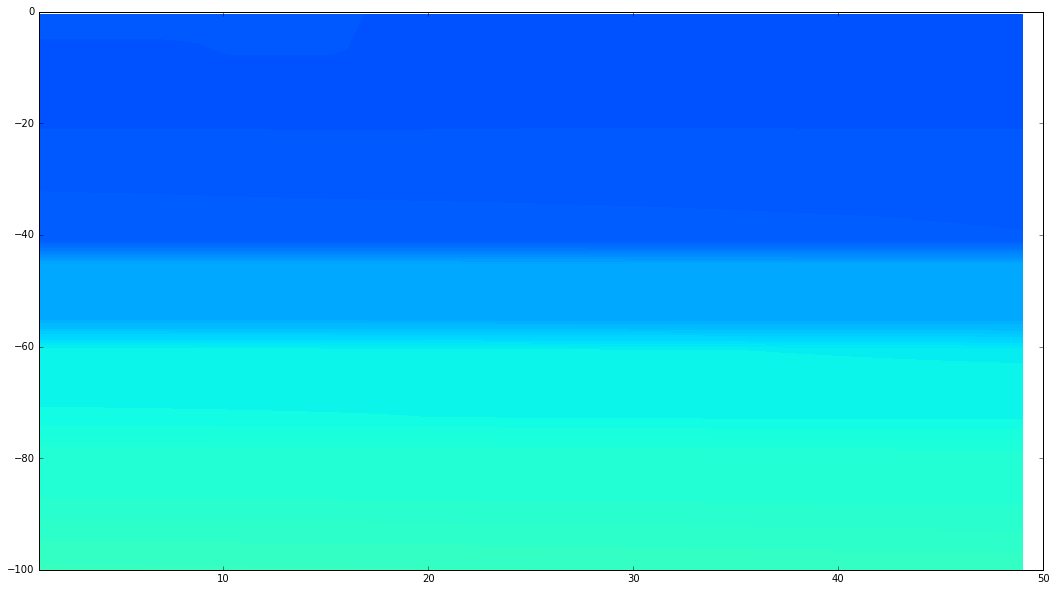

In [49]:
plt.contourf(np.linspace(1,50,50),ds3.zMid[44,0,:100].values,ds3.salinity[:,0,:100].T,levels=np.linspace(35.7,37,150))
plt.ylim(-100,0)
#plt.xlim(0,0.05)

In [ ]:
ds3 = ds2.isel(Time=48,nCells=40)
plt.plot(ds3.vertViscTopOfCell.values,ds3.zTop.values)

In [ ]:
ds2.zTo

In [23]:
dsm=ds2.mean(dim="Time")
dsm1=ds.mean(dim="Time")

In [ ]:
ds1o = xray.open_dataset('/net/scratch1/pwolfram/ZISO_5km/init.nc')
ds1F = xray.open_dataset('/net/scratch1/pwolfram/ZISO_5km/forcing.nc')

ds2o = xray.open_dataset('/net/scratch3/lvanroekel/init_step2/init.nc')
ds2F = xray.open_dataset('/net/scratch3/lvanroekel/init_step2/forcing.nc')

In [ ]:
print ds2F.temperatureInteriorRestoringValue[0,:,1].values.min(),ds1F.temperatureInteriorRestoringValue[0,:,0].min().values

In [ ]:
print ds2F.temperatureSurfaceRestoringValue[0,:].min().values,ds2F.temperatureSurfaceRestoringValue[0,:].max().values

In [ ]:
ds2o.refZMid.values

In [ ]:
inds = np.where(ds2o.latCell.values < -70*np.pi/180. + 80/6371.228)
ds2F.temperatureInteriorRestoringValue[0,inds[0],1].values.min()

In [ ]:
plt.plot(ds2o.refZMid.values,ds2F.temperatureInteriorRestoringValue[0,114005,:].values)
plt.plot(ds1o.refZMid.values,ds1F.temperatureInteriorRestoringValue[0,91999,:].values)

In [ ]:
plt.scatter(ds2o.lonCell.values,ds2o.latCell.values,s=15,c=ds2o.bottomDepth[:].values)
plt.colorbar()

In [ ]:
plt.scatter(ds1o.xCell.values,ds1o.yCell.values,s=15,c=ds1o.bottomDepth[:].values)
plt.colorbar()

In [ ]:
plt.scatter(ds2.lonCell[:].values*180/np.pi,ds2.latCell[:].values*180/np.pi,s=10,c=ds2.velocityZonal[1,:,0].values,edgecolor='none')
plt.colorbar()

In [5]:
dsz1.temperatureZonalMean.values.shape

(803, 400, 100)

In [4]:
dsz1=xray.open_mfdataset('/net/scratch1/lvanroekel/newMesh_w_topo/analysis_members/zonalMeans.0*.nc',preprocess=preprocess_mpas)
dsz2=xray.open_mfdataset('/net/scratch3/lvanroekel/ZISO_GLOBAL/oldanalysis/zonalMeans.0011*.nc',preprocess=preprocess_mpas)


(-2500, 0)

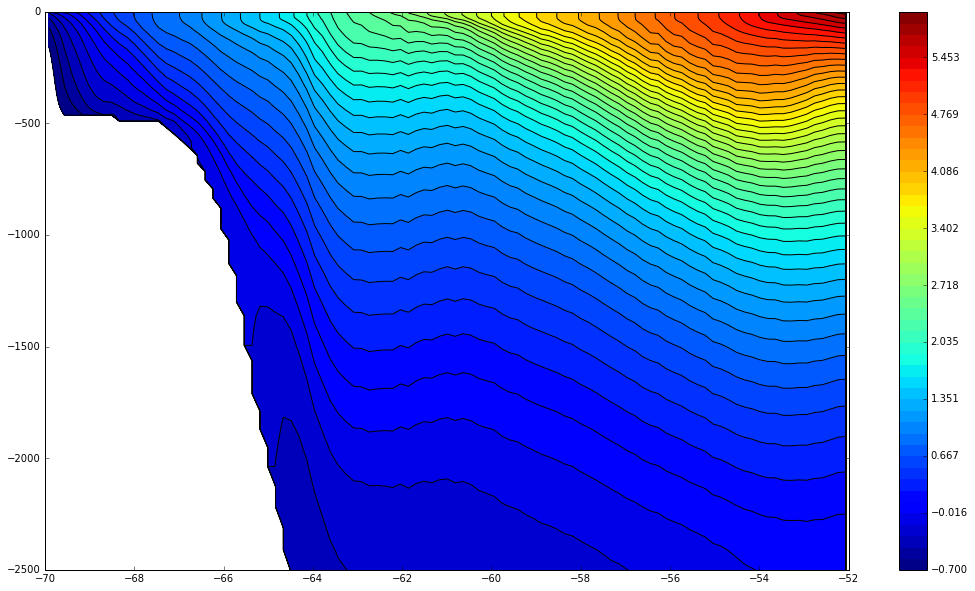

In [11]:
plt.contourf(dsz1.binCenterZonalMean.values[0,:]*180/np.pi,dsz1.refZMid.values[0,:], \
            dsz1.temperatureZonalMean[700:,:,:].mean(axis=0).values.T,levels=np.linspace(-0.7,6,50))
plt.colorbar()
plt.contour(dsz1.binCenterZonalMean.values[0,:]*180/np.pi,dsz1.refZMid.values[0,:], \
            dsz1.temperatureZonalMean[700:,:,:].mean(axis=0).values.T,levels=np.linspace(-0.7,6,50),colors='k')
plt.xlim(-70,-52)
plt.ylim(-2500,0)


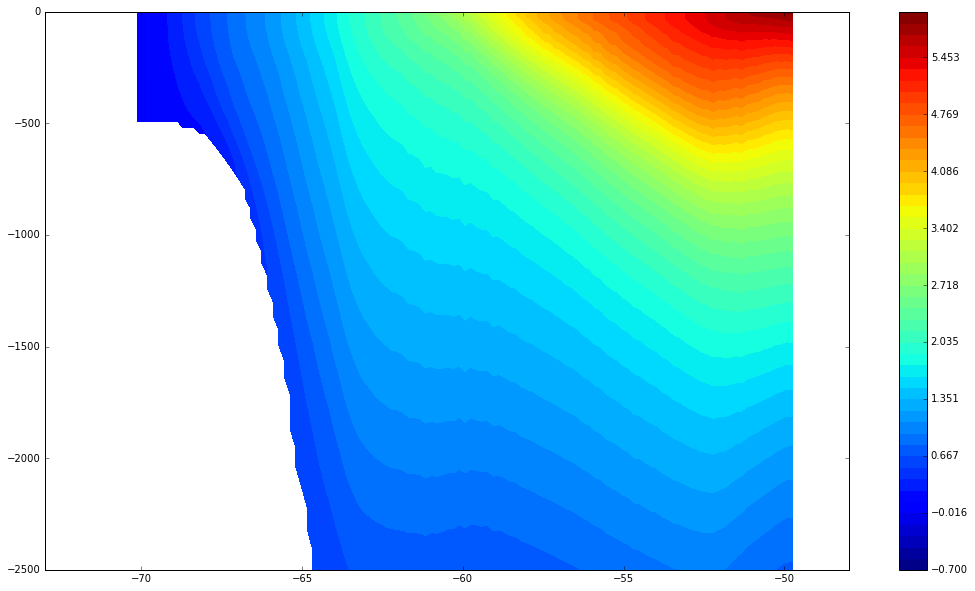

In [80]:

plt.contourf(dsz2.binCenterZonalMean.values[0,:]*180/np.pi,dsz2.refZMid.values[0,:], \
            dsz2.temperatureZonalMean.mean(axis=0).values.T,levels=np.linspace(-0.7,6,50))
plt.xlim(-73,-48)
plt.ylim(-2500,0)
plt.colorbar()

In [ ]:

plt.contourf(ds1.binCenterZonalMean.values[0,:]*180/np.pi,ds1.refZMid.values[0,:], \
            ds1.temperatureZonalMean.values[100,:,:].T,vmin=-1,vmax=7,\
            levels=np.linspace(-2,7,10))
plt.xlim(-73,-48)
plt.ylim(-2500,0)

In [87]:
 dsz1.velocityZonalZonalMean.values.shape

(586, 400, 100)

In [16]:
np.linspace(-0.3,0.3,21)

array([-0.3 , -0.27, -0.24, -0.21, -0.18, -0.15, -0.12, -0.09, -0.06,
       -0.03,  0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,  0.21,
        0.24,  0.27,  0.3 ])

(-2500, 0)

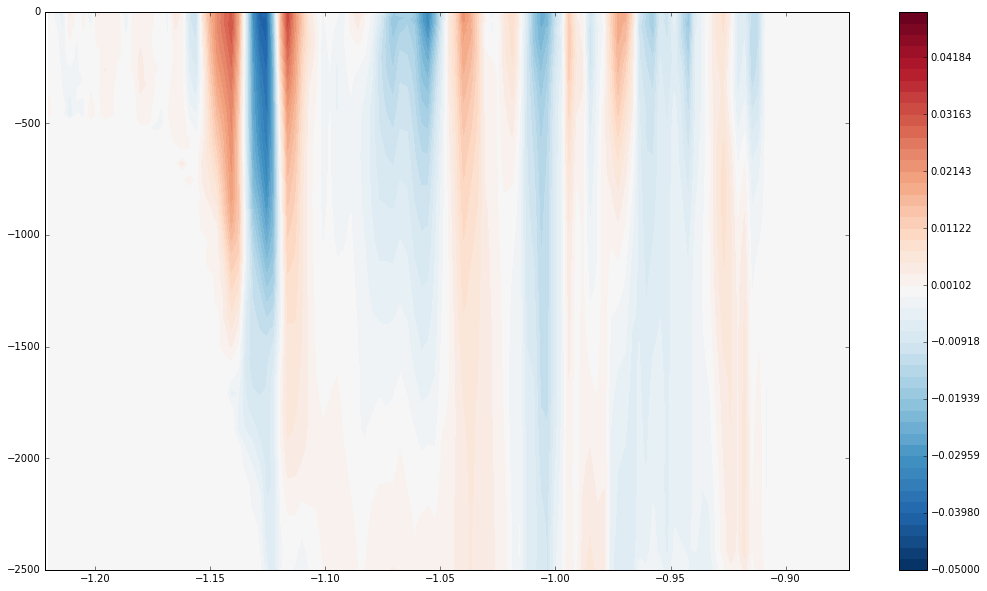

In [7]:
plt.contourf(dsz1.binCenterZonalMean.values[0,:],dsz1.refZMid.values[0,:], \
            dsz1.velocityZonalZonalMean[800,:,:].values.T - dsz1.velocityZonalZonalMean[500,:,:].values.T, \
            levels = np.linspace(-0.05,0.05,50), cmap='RdBu_r')
plt.colorbar()
plt.xlim(-70*np.pi/180,-50*np.pi/180)
plt.ylim(-2500,0)

(-2500, 0)

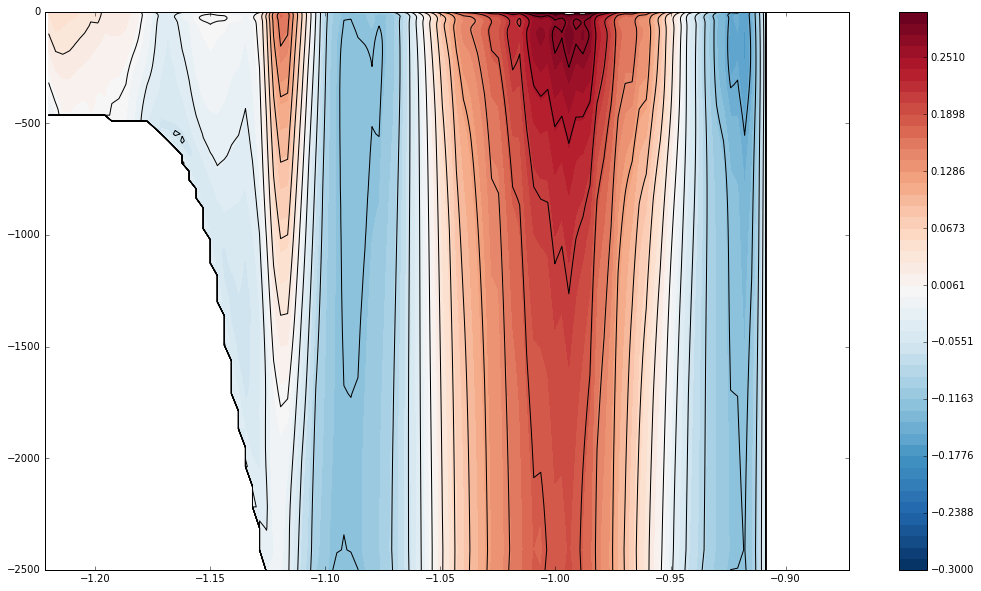

In [15]:
plt.contourf(dsz1.binCenterZonalMean.values[0,:],dsz1.refZMid.values[0,:], \
            dsz1.velocityZonalZonalMean[802,:,:].values.T , \
            levels = np.linspace(-0.3,0.3,50), cmap='RdBu_r')
plt.colorbar()
plt.contour(dsz1.binCenterZonalMean.values[0,:],dsz1.refZMid.values[0,:], \
            dsz1.velocityZonalZonalMean[802,:,:].values.T , \
            levels = np.linspace(-0.3, 0.3, 21), colors='k')
plt.xlim(-70*np.pi/180,-50*np.pi/180)
plt.ylim(-2500,0)

(-2500, 0)

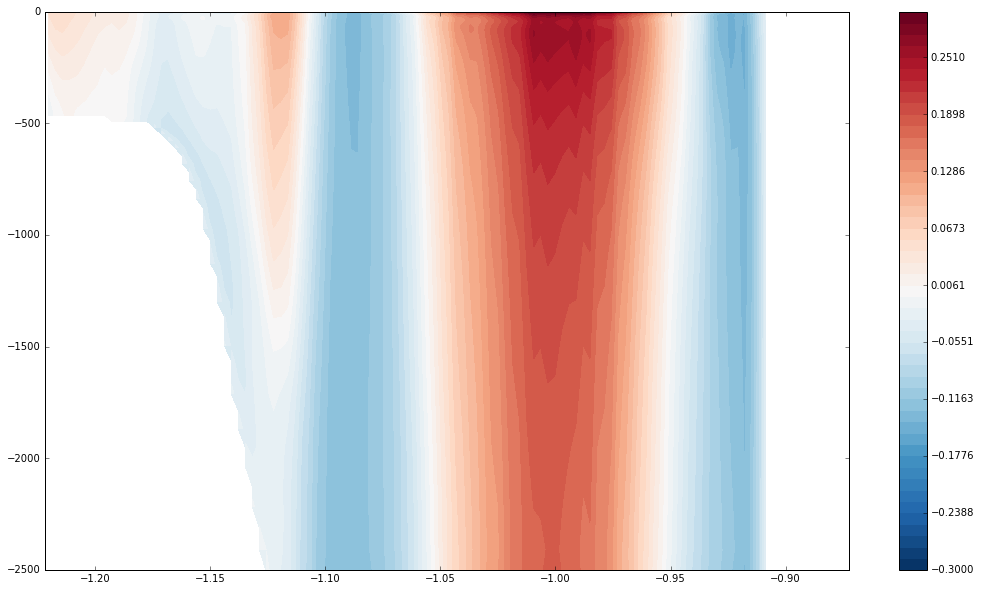

In [139]:
plt.contourf(dsz1.binCenterZonalMean.values[0,:],dsz1.refZMid.values[0,:], \
            dsz1.velocityZonalZonalMean[300,:,:].values.T , \
            levels = np.linspace(-0.3,0.3,50), cmap='RdBu_r')
plt.colorbar()
plt.xlim(-70*np.pi/180,-50*np.pi/180)
plt.ylim(-2500,0)

In [ ]:
np.linspace(-0.2,0.2,7)

In [ ]:
#plotting rules
axis_font = {'fontname':'Arial', 'size':'18'}    
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'normal'}
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [25]:
meshData = Dataset(meshFile);
initData = Dataset(initFile);
forcingData = Dataset(forcingFile);
outputData = Dataset(outputFile);

nCells = len(meshData.dimensions['nCells']);
nVertices = len(meshData.dimensions['nVertices']);
nEdges = len(meshData.dimensions['nEdges']);
nVertLevels = len(outputData.dimensions['nVertLevels']);
nTime = len(outputData.dimensions['Time']);

print 'mesh file: ', meshFile
print 'init file: ', initFile
print 'forcing file: ', forcingFile
print 'output file: ', outputFile
print ' '
print 'nCells: ', nCells
print 'nVertices: ', nVertices
print 'nEdges: ', nEdges
print 'nVertLevels: ', nVertLevels
print 'nTime: ', nTime

mesh file:  /net/scratch1/lvanroekel/newMesh_w_topo/mesh.nc
init file:  /net/scratch1/lvanroekel/newMesh_w_topo/init.nc
forcing file:  /net/scratch1/lvanroekel/newMesh_w_topo/forcing.nc
output file:  /net/scratch1/lvanroekel/newMesh_w_topo/output/KPP_test.0005-01-01_00.00.00.nc
 
nCells:  114018
nVertices:  229940
nEdges:  343958
nVertLevels:  100
nTime:  7


In [ ]:
#get buoyancy levels and thresholding
potentialDensityMidRef = outputData.variables['potentialDensityMidRef'][:];

gravity = 9.81
potentialDensity0 = (np.amin(potentialDensityMidRef)+np.amax(potentialDensityMidRef))/2.0
buoyancy = -gravity * (potentialDensityMidRef - potentialDensity0) / potentialDensity0

samplingThreshold = 0.05

print ''
print ' sampling threshold in percent: ', samplingThreshold*100
print ''

In [20]:
#set number of bins in longitude and latitude
nBinsLongitude = 100
nBinsLatitude = 40

rtd = 180.0/pi

latCell = meshData.variables['latCell'][:];
latCellMax = np.amax(latCell)
latCellMin = np.amin(latCell)

lonCell = meshData.variables['lonCell'][:];
indVals = np.where(lonCell > np.pi)
lonCell[indVals] -= np.pi*2.0
lonCellMax = 120*np.pi/180. #np.amax(lonCell)
lonCellMin = 50*np.pi/180. #np.amin(lonCell)

binWidthLongitude = (lonCellMax - lonCellMin) / nBinsLongitude
binWidthLatitude =  (latCellMax - latCellMin) / nBinsLatitude

binEdgeLatitude = zeros((nBinsLatitude+1))
for j in range(0,nBinsLatitude+1):
    binEdgeLatitude[j] = latCellMin + j*binWidthLatitude

binCenterLatitude = zeros((nBinsLatitude))
for j in range(0,nBinsLatitude):
    binCenterLatitude[j] = (binEdgeLatitude[j] + binEdgeLatitude[j+1])/2.0
    
binEdgeLongitude = zeros((nBinsLongitude+1))
for i in range(0,nBinsLongitude+1):
    binEdgeLongitude[i] = lonCellMin + i*binWidthLongitude

binCenterLongitude = zeros((nBinsLongitude))
for i in range(0,nBinsLongitude):
    binCenterLongitude[i] = (binEdgeLongitude[i] + binEdgeLongitude[i+1])/2.0

print 'min latCell: ', latCellMin*rtd
print 'max latCell: ', latCellMax*rtd
print 'min lonCell: ', lonCellMin*rtd
print 'max lonCell: ', lonCellMax*rtd

min latCell:  -69.9996314508
max latCell:  -52.0144097417
min lonCell:  50.0
max lonCell:  120.0


In [ ]:
#sort mesh into latitude and longitude masks
maskLongitude = zeros((nCells))-10
maskLongitude = maskLongitude.astype(int)
maskLatitude = zeros((nCells))-10
maskLatitude = maskLatitude.astype(int)

#assign every iCell between lonMin and LonMax to a longitude/latitude bin
for iCell in range(0,nCells):
    longitude = lonCell[iCell]
    latitude = latCell[iCell]
    if longitude >= lonCellMin and longitude <= lonCellMax:
        iBin = (longitude-binCenterLongitude[0])/binWidthLongitude
        maskLongitude[iCell]=np.rint(iBin)
        jBin = (latitude-binCenterLatitude[0])/binWidthLatitude
        maskLatitude[iCell]=np.rint(jBin)

print 'min/max longitude bin value: ', np.amin(maskLongitude),np.amax(maskLongitude) 
print 'min/max latitude bin value: ', np.amin(maskLongitude),np.amax(maskLatitude) 

In [ ]:
#Horizontal Cross-Section Plots Binning DOESn't seem to work

field = np.zeros((nBinsLongitude,nBinsLatitude))
count = np.zeros((nBinsLongitude,nBinsLatitude))

temp=outputData.variables['temperature'][0,:,0]

iCell=0
for i in range(nBinsLongitude):
    for j in range(nBinsLatitude):
        if maskLongitude[iCell] > -1 and maskLatitude[iCell] > -1:
            field[maskLongitude[iCell],maskLatitude[iCell]] = temp[iCell]
            count[maskLongitude[iCell],maskLatitude[iCell]] += 1
            
        iCell+=1

print count.min(), count.max()
plt.contourf(binCenterLongitude*rtd, binCenterLatitude*rtd, field.T)
#plt.xlim(-40, 40)

In [21]:
from scipy.spatial import cKDTree

def lon_lat_to_cartesian(lon, lat, R = 6371229):
    """
    calculates lon, lat coordinates of a point on a sphere with
    radius R
    """
    lon_r = np.radians(lon)
    lat_r = np.radians(lat)

    x = R * np.cos(lat_r) * np.cos(lon_r)
    y = R * np.cos(lat_r) * np.sin(lon_r)
    z = R * np.sin(lat_r)
    return x,y,z

def init_tree(lon_w, lon_e, lat_s, lat_n, nLat, nLon):
    
    xs, ys, zs = lon_lat_to_cartesian(lonCell*rtd,latCell*rtd)
    tree = cKDTree(zip(xs, ys, zs))
    
    lonT = np.linspace(50,120.,nLon)
    latT = np.linspace(-70,-50,nLat)

    lonTarg, latTarg = np.meshgrid(lonT, latT)
    xt, yt, zt = lon_lat_to_cartesian(lonTarg.flatten(),latTarg.flatten())
    
    d, inds = tree.query(zip(xt, yt, zt), k = 1)
    
    return d, inds, lonTarg, latTarg

def interp_fields(field, d, inds):
    #d, inds = tree.query(zip(xt, yt, zt), k = 10)
    #w = 1.0 / d**2
    #interpFld = np.sum(w * temp.flatten()[inds],axis=1) / np.sum(w, axis=1)
    #interpFld.shape = lonTarg.shape
    
    return field.flatten()[inds].reshape(lonTarg.shape)
     

In [ ]:
f1 = '/net/scratch3/lvanroekel/ZISO_GLOBAL/newMesh_w_topo/init_out.nc';
ncid = Dataset(f1,mode='r')
lono = ncid.variables['lonCell'][:]
lato = ncid.variables['latCell'][:]
layero = ncid.variables['layerThickness'][:]
resto = ncid.variables['restingThickness'][:]
tempo = ncid.variables['temperature'][:]
salto = ncid.variables['salinity'][:]
ncid.close()

f1 = '/net/scratch3/lvanroekel/init_step2/init.nc'
ncid = Dataset(f1,mode='r+')
lonTarg = ncid.variables['lonCell'][:]
latTarg = ncid.variables['latCell'][:]
nVelTarg = ncid.variables['normalVelocity'][:]
layerT = ncid.variables['layerThickness'][:]
restT = ncid.variables['restingThickness'][:]
tempT = ncid.variables['temperature'][:]
saltT = ncid.variables['salinity'][:]


In [ ]:
from scipy.spatial import cKDTree

def lon_lat_to_cartesian(lon, lat, R = 6371229):
    """
    calculates lon, lat coordinates of a point on a sphere with
    radius R
    """
    lon_r = np.radians(lon)
    lat_r = np.radians(lat)

    x = R * np.cos(lat_r) * np.cos(lon_r)
    y = R * np.cos(lat_r) * np.sin(lon_r)
    z = R * np.sin(lat_r)
    return x,y,z

def init_tree():
    rtd = 180./np.pi
    xs, ys, zs = lon_lat_to_cartesian(lono*rtd,lato*rtd)
    tree = cKDTree(zip(xs, ys, zs))
    
    xt, yt, zt = lon_lat_to_cartesian(lonTarg.flatten()*rtd,latTarg.flatten()*rtd)
    
    d, inds = tree.query(zip(xt, yt, zt), k = 1)
    
    return d, inds

def interp_fields(field, d, inds):
    #d, inds = tree.query(zip(xt, yt, zt), k = 10)
    #w = 1.0 / d**2
    #interpFld = np.sum(w * temp.flatten()[inds],axis=1) / np.sum(w, axis=1)
    #interpFld.shape = lonTarg.shape
    
    return field.flatten()[inds].reshape(lonTarg.shape)
     

In [ ]:
d, inds = init_tree()

In [ ]:
ncid.variables['temperature'][0,:,:] = tempo[0,inds,:]
ncid.variables['layerThickness'][0,:,:] = layero[0,inds,:]
ncid.variables['salinity'][0,:,:] = salto[0,inds,:]
ncid.variables['restingThickness'][:,:] = resto[inds,:]
ncid.close()

In [ ]:
dsnn = xray.open_dataset('/net/scratch3/lvanroekel/ZISO_GLOBAL/newMesh_w_topo//forcing.nc')

In [ ]:
dsorig.temperature.values.shape

In [ ]:
tempT[0,:,:] = ds.temperature

In [ ]:
plt.scatter(dsorig.lonCell[:],dsorig.latCell[:],s=15,c=dsnn.temperatureSurfaceRestoringValue.values)
plt.colorbar()

In [ ]:
plt.scatter(lonTarg,latTarg,s=15,c=dsnn.temperatureSurfaceRestoringValue.values)
plt.colorbar()

In [26]:
botDepth = initData.variables['bottomDepth'][:]
#zmid = outputData.variables['zMid'][0,:,:]
#temp = outputData.variables['temperature'][0,:,:]
#zon = outputData.variables['velocityZonal'][0,:,:]
#mer = outputData.variables['velocityMeridional'][0,:,:]
#ke = 0.5*(zon*zon + mer*mer)

zmid = dsm1.zMid.values[:,:]
temp = dsm1.temperature.values[:,:]
zon = dsm1.velocityZonal.values[:,:]
mer = dsm1.velocityMeridional.values[:,:]
ke = 0.5*(zon*zon + mer*mer)

nLon = 200
nLat = 100
lon_w = 50
lon_e = 120
lat_s = -70
lat_n = -50

outTemp = np.zeros((nLat,nLon,nVertLevels))
outU = np.zeros((nLat,nLon,nVertLevels))
outKE = np.zeros((nLat,nLon,nVertLevels))

d, inds, lonTarg, latTarg = init_tree(lon_w, lon_e, lat_s, lat_n, nLat, nLon)

for k in range(nVertLevels):
    outTemp[:,:,k] = interp_fields(temp[:,k], d, inds)
    outU[:,:,k] = interp_fields(zon[:,k], d, inds)
    outKE[:,:,k] = interp_fields(ke[:,k], d, inds)

In [27]:
botInterp = np.zeros((nLat,nLon))
botInterp = interp_fields(botDepth, d, inds)

zInterp = np.zeros((nLat,nLon,nVertLevels))

for k in range(nVertLevels):
    zInterp[:,:,k] = interp_fields(zmid[:,k], d, inds)
#latZMask = np.zeros((nLat,nVertLevels))

In [28]:
#create vertical and horizontal cross sections 

zonal_avg = True
#If not zonal average, specify a longitude.
lon_slice = 0

if zonal_avg:
    tempAvg = outTemp.mean(axis=1)
    uAvg = outU.mean(axis=1)
    keAvg = outKE.mean(axis=1)
    zAvg = zInterp.mean(axis=1)
else:
    spot = (lon[0,:] - lon_slice).argmin()
    tempAvg = np.squeeze(outTemp[:,spot,:])
    uAvg = np.squeeze(outU[:,spot,:])
    keAvg = np.squeeze(outKE[:,spot,:])
    zAvg = np.squeeze(zInterp[:,spot,:])

# create yz mask

mask = np.ones((nLat,nVertLevels))
for i in range(nLat):
    zdiff = abs(zAvg[i,:nVertLevels-1]-zAvg[i,1:nVertLevels])
    indVals = np.where(zdiff < 1E-2)[0] 
    mask[i,indVals] = np.nan
    mask[i,nVertLevels-1] = np.nan
        
latyz = np.zeros((nLat,nVertLevels))
for i in range(nVertLevels):
    latyz[:,i] = latTarg[:,0]

(-3500, 0)

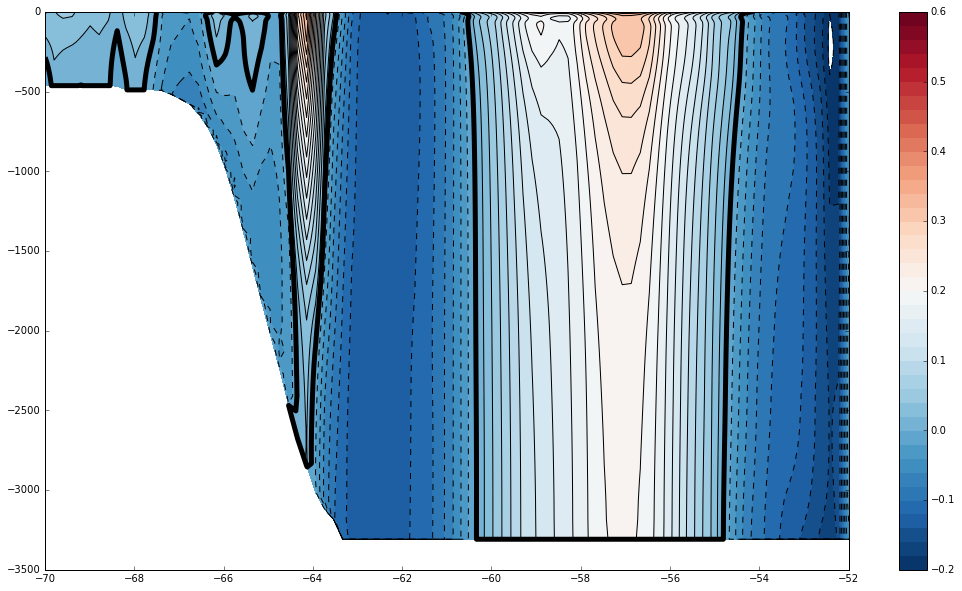

In [54]:
plt.contourf(latyz,zAvg, \
            uAvg , \
            levels = np.linspace(-0.2,0.6,41),cmap='RdBu_r')
plt.colorbar()
plt.contour(latyz,zAvg, \
            uAvg , \
            levels = np.linspace(-0.2,0.6,41), colors='k')
plt.contour(latyz,zAvg, \
            uAvg , \
            levels = [0], colors='k',linewidths=5)
plt.xlim(-70,-52)
plt.ylim(-3500,0)

In [45]:
np.linspace(-0.7,6,50)

array([-0.7       , -0.56326531, -0.42653061, -0.28979592, -0.15306122,
       -0.01632653,  0.12040816,  0.25714286,  0.39387755,  0.53061224,
        0.66734694,  0.80408163,  0.94081633,  1.07755102,  1.21428571,
        1.35102041,  1.4877551 ,  1.6244898 ,  1.76122449,  1.89795918,
        2.03469388,  2.17142857,  2.30816327,  2.44489796,  2.58163265,
        2.71836735,  2.85510204,  2.99183673,  3.12857143,  3.26530612,
        3.40204082,  3.53877551,  3.6755102 ,  3.8122449 ,  3.94897959,
        4.08571429,  4.22244898,  4.35918367,  4.49591837,  4.63265306,
        4.76938776,  4.90612245,  5.04285714,  5.17959184,  5.31632653,
        5.45306122,  5.58979592,  5.72653061,  5.86326531,  6.        ])

In [ ]:
temp_dev_ta = 2.
temp_dev_tb = 1.
merid_extent = .349066
min_lat = -1.2217
mean_restore = 3.
latCell = np.linspace(-1.2217, -50*np.pi/180., 100)

temp1 = mean_restore + temp_dev_ta * np.tanh(2.0*(latCell - min_lat - merid_extent / 2.0) / (merid_extent / 2.0)) + temp_dev_tb * (latCell - min_lat - merid_extent / 2.0) / (merid_extent / 2.0)
temp_dev_ta = 1.  
temp_dev_tb = 2.
temp2 = mean_restore + temp_dev_ta * np.tanh(2.0*(latCell - min_lat - merid_extent / 2.0) / (merid_extent / 2.0)) + temp_dev_tb * (latCell - min_lat - merid_extent / 2.0) / (merid_extent / 2.0)

plt.plot(latCell*180/np.pi,temp1)
plt.plot(latCell*180/np.pi,temp2)
print temp1.min(), temp1.max()
print temp2.min(), temp2.max()

In [ ]:
ncid=Dataset('/net/scratch3/lvanroekel/ZISO_GLOBAL/newMesh_w_topo/forcing.nc',mode='r')
surfRest = ncid.variables['temperatureSurfaceRestoringValue'][:]

In [ ]:
np.arctanh(1E-4 - 1)*100000+500000

In [ ]:
np.arctanh(.1/1500-1)*150000-_5

In [ ]:
bottom_depth1 = 2500
bottom_depth2 = 3500
shelf_depth = 500
slope_center1 = 500000
slope_center2 = -_14
slope_half_width1 = 100000
slope_half_width2 = 150000
latCell = np.linspace(0,2000000,100)
bot1 = shelf_depth + 0.5 * (bottom_depth1 - shelf_depth) * ( 1.0 + np.tanh(((latCell) - slope_center1) / slope_half_width1))
bot2 = shelf_depth + 0.5 * (bottom_depth2 - shelf_depth) * ( 1.0 + np.tanh(((latCell) - slope_center2) / slope_half_width2))

piece = np.zeros(100)
for i,ys in enumerate(latCell):
    if ys <= slope_center1:
        piece[i] = bot1[i]
    elif ys > slope_center1 and ys <= slope_center1 + 100000:
        piece[i] = 0.01*(ys - slope_center1) + 1500
    else:
        piece[i] = shelf_depth + 0.5 * (bottom_depth1 + 1500 - shelf_depth) * ( 1.0 + \
                                                        np.tanh(((latCell[i] - 100000) - slope_center1) / slope_half_width1))
plt.plot(latCell,bot1)
plt.plot(latCell,bot2)
plt.plot(latCell,piece,'r')

In [ ]:
bot1[0]

In [ ]:
npts = 1000
zeta = np.linspace(-2,0,npts)
inds1 = np.where(zeta < -1.0)
inds2 = np.where(zeta >= -1.0)

phisorig = np.zeros(npts)
phisorig[inds1] = (-28.86 - 98.96*zeta[inds1])**(-1./3.)
phisorig[inds2] = (1 - 16.*zeta[inds2])**(-1./2.)
phis2 = (1 - 77.3962*zeta)**(-1./3.)
plt.plot(zeta,phisorig)
plt.plot(zeta,phis2)
plt.plot(zeta,(1 - 60.0*zeta)**(-1./3.))

In [ ]:
def fit_func(zeta, a, b):
    return (1 + b*zeta);

from scipy.optimize import curve_fit

params = curve_fit(fit_func, zeta, phisorig**3)

In [ ]:
params

In [ ]:
bottom_depth1 = 3500
bottom_depth2 = 2500
shelf_depth = 500
slope_center1 = 0.099267
slope_center2 = slope_center1-0.012
slope_half_width1 = 0.023
slope_half_width2 = 0.017453
bot1 = shelf_depth + 0.5 * (bottom_depth1 - shelf_depth) * ( 1.0 + np.tanh(((latCell - min_lat) - slope_center1) / slope_half_width1))
bot2 = shelf_depth + 0.5 * (bottom_depth2 - shelf_depth) * ( 1.0 + np.tanh(((latCell - min_lat) - slope_center2) / slope_half_width2))

In [ ]:
plt.plot(latCell,bot1)
plt.plot(latCell,bot2)

In [ ]:
plt.contourf(latyz,zAvg,tempAvg*mask,levels=np.linspace(-1,6,15))
plt.colorbar()

In [ ]:
plt.contourf(latyz,zAvg,uAvg*mask,vmin=-0.2,vmax=0.5)
plt.colorbar()

In [ ]:
plt.contourf(lonTarg,latTarg,interpFld)

In [ ]:
#zonally-averaged masking

#read in ensemble-averaged buoyancy mask
buoyancyMaskEA = outputData.variables['buoyancyMaskEA'][iTimeStart,:,:];

#produce a lat/lon version of this mask
binned_buoyancyMaskEA = zeros((nBinsLatitude,nBuoyancyLevels))

#loop over the latitude bins
#for each bin, mask out all other bins
#sum all iCells in this bin and normalize
for jBin in range(0,nBinsLatitude):
    binMask=ma.masked_not_equal(maskLatitude,jBin) - jBin + 1    # this produces a 0/1 mask
    binMask = binMask.astype(int)
    for kLevel in range(0,nBuoyancyLevels):
        rMask = np.multiply(buoyancyMaskEA[:,kLevel],binMask)
        binned_buoyancyMaskEA[jBin,kLevel]=np.sum(rMask)/np.sum(binMask)

In [ ]:
colorLevels=linspace(0.0,1.00,101)
contourLevels=linspace(0.0,1.0,21)
plt.contourf(binCenterLatitude*rtd,buoyancy,binned_buoyancyMaskEA.T,levels=colorLevels)
plt.colorbar()
#plt.contour(binCenterLatitude*rtd,buoyancy,binned_buoyancyMaskEA.T,levels=contourLevels,colors='gray',linewidth=2)

In [ ]:
#height of buoyancy levels

#(this variable is missing from this EPFT files.)
#(not sure how to map back to z-space without this field.)

#heightMidBuoyCoorEA = outputData.variables['heightMidBuoyCoorEA'][iTimeStart,:,:];
#heightMidBuoyCoorEA=ma.masked_where(buoyancyMaskEA<samplingThreshold,heightMidBuoyCoorEA)

#loop over the latitude bins
#for each bin, mask out all other bins
#sum all iCells in this bin and normalize
#binned_height = zeros((nBinsLatitude,nBuoyancyLevels))
#for jBin in range(0,nBinsLatitude):
    #binMask=ma.masked_not_equal(maskLatitude,jBin) - jBin + 1
    #binMask = binMask.astype(int)
    #for kLevel in range(0,nBuoyancyLevels):
        #rMask = np.multiply(heightMidBuoyCoorEA[:,kLevel],binMask)
        #binned_height[jBin,kLevel]=np.sum(rMask)/np.sum(binMask)
        
print 'done'

In [ ]:
#colorLevels=linspace(-4000,0,101)
#contourLevels=linspace(-4000,0,21)
#plt.contourf(binCenterLatitude*rtd,buoyancy,binned_height.T,levels=colorLevels)
#plt.colorbar()
#plt.contour(binCenterLatitude*rtd,buoyancy,binned_height.T,levels=contourLevels,colors='gray',linewidth=2)

#print binned_height[30,1:100]

In [ ]:
#uTWA and vTWA
uTWA = outputData.variables['uTWA'][iTimeStart,:,:];
vTWA = outputData.variables['vTWA'][iTimeStart,:,:];

binned_uTWA = zeros((nBinsLatitude,nBuoyancyLevels))
binned_vTWA = zeros((nBinsLatitude,nBuoyancyLevels))

uTWA=ma.masked_where(buoyancyMaskEA<samplingThreshold,uTWA)
vTWA=ma.masked_where(buoyancyMaskEA<samplingThreshold,vTWA)

#loop over the latitude bins
#for each bin, mask out all other bins
#sum all iCells in this bin and normalize
for jBin in range(0,nBinsLatitude):
    binMask=ma.masked_not_equal(maskLatitude,jBin) - jBin + 1
    binMask = binMask.astype(int)
    for kLevel in range(0,nBuoyancyLevels):
        rMask = np.multiply(uTWA[:,kLevel],binMask)
        binned_uTWA[jBin,kLevel]=np.sum(rMask)/np.sum(binMask)
        rMask = np.multiply(vTWA[:,kLevel],binMask)
        binned_vTWA[jBin,kLevel]=np.sum(rMask)/np.sum(binMask)
        
print 'done'

In [ ]:
colorLevels=linspace(-0.2,0.3,101)
contourLevels=linspace(-0.2,0.3,21)
plt.contourf(binCenterLatitude*rtd,buoyancy,binned_uTWA.T,levels=colorLevels)
plt.colorbar()
plt.contour(binCenterLatitude*rtd,buoyancy,binned_uTWA.T,levels=contourLevels,colors='gray',linewidth=2)

In [ ]:
colorLevels=linspace(-0.05,0.05,101)
contourLevels=linspace(-0.05,0.05,21)
plt.contourf(binCenterLatitude*rtd,buoyancy,binned_vTWA.T,levels=colorLevels)
plt.colorbar()
plt.contour(binCenterLatitude*rtd,buoyancy,binned_vTWA.T,levels=contourLevels,colors='gray',linewidth=2)